## Lecture 06 - Model Process, Variable Selection, Feature Engineer, Model Assessment

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

## UCI Bike Sharing Dataset
https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
#### Target variable: cnt

#### Variable List
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- **cnt: count of total rental bikes including both casual and registered**

## 1. Data Preprocessing
### 1.1 Importing Data

In [16]:
bikes=pd.read_csv("Data/bikedc.csv")

In [18]:
bikes.shape

(8645, 15)

### 1.2 Data Wrangling and Visualization 

#### Basic Statistics

In [20]:
print(bikes.head())

   season  mnth  day  hr  holiday  weekday  workingday  weathersit  temp  \
0       1     1    1   0        0        6           0           1  0.24   
1       1     1    1   1        0        6           0           1  0.22   
2       1     1    1   2        0        6           0           1  0.22   
3       1     1    1   3        0        6           0           1  0.24   
4       1     1    1   4        0        6           0           1  0.24   

    atemp   hum  windspeed  casual  registered  cnt  
0  0.2879  0.81        0.0       3          13   16  
1  0.2727  0.80        0.0       8          32   40  
2  0.2727  0.80        0.0       5          27   32  
3  0.2879  0.75        0.0       3          10   13  
4  0.2879  0.75        0.0       0           1    1  


In [21]:
print(bikes.describe())

            season         mnth         day           hr      holiday  \
count  8645.000000  8645.000000  8645.00000  8645.000000  8645.000000   
mean      2.513592     6.573973   184.39572    11.573626     0.027646   
std       1.105477     3.428147   104.82334     6.907822     0.163966   
min       1.000000     1.000000     1.00000     0.000000     0.000000   
25%       2.000000     4.000000    94.00000     6.000000     0.000000   
50%       3.000000     7.000000   185.00000    12.000000     0.000000   
75%       3.000000    10.000000   275.00000    18.000000     0.000000   
max       4.000000    12.000000   365.00000    23.000000     1.000000   

           weekday   workingday   weathersit         temp       atemp  \
count  8645.000000  8645.000000  8645.000000  8645.000000  8645.00000   
mean      3.012724     0.683748     1.437594     0.489069     0.46900   
std       2.006370     0.465040     0.653859     0.197943     0.17676   
min       0.000000     0.000000     1.000000     0

#### Histogram

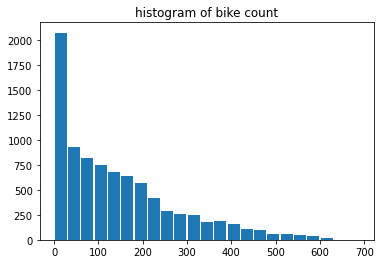

In [23]:
binblock=np.arange(0, 700, 30)
plt.hist(bikes['cnt'], bins = binblock, rwidth=0.9)
plt.title("histogram of bike count")
plt.show()

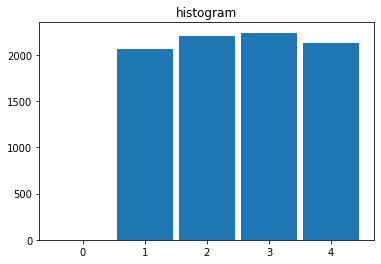

In [25]:
binblock=np.arange(-0.5, 5, 1)
plt.hist(bikes['season'], bins = binblock, rwidth=0.9)
plt.title("histogram")
plt.show()

In [24]:
np.unique(bikes['season'])

array([1, 2, 3, 4])

In [26]:
np.unique(bikes['windspeed'])

array([0.    , 0.0896, 0.1045, 0.1343, 0.1642, 0.194 , 0.2239, 0.2537,
       0.2836, 0.2985, 0.3284, 0.3582, 0.3881, 0.4179, 0.4478, 0.4627,
       0.4925, 0.5224, 0.5522, 0.5821, 0.6119, 0.6418, 0.6567, 0.6866,
       0.7463, 0.7761, 0.806 , 0.8358, 0.8507])

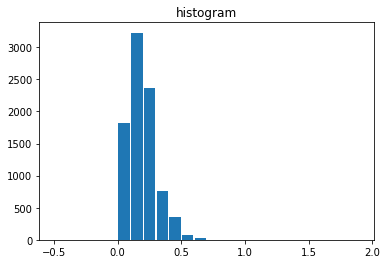

In [27]:
binblock=np.arange(-0.5, 2, 0.1)
plt.hist(bikes['windspeed'], bins = binblock, rwidth=0.9)
plt.title("histogram")
plt.show()

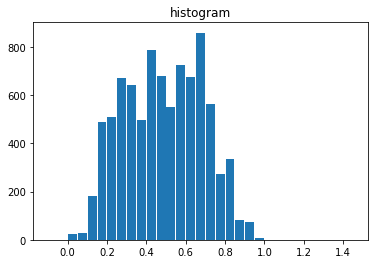

In [28]:
binblock=np.arange(-0.1, 1.5, 0.05)
plt.hist(bikes['temp'], bins = binblock, rwidth=0.9)
plt.title("histogram")
plt.show()

#### Scatter Plots & Data Aggregation

##### Predictor: weekday

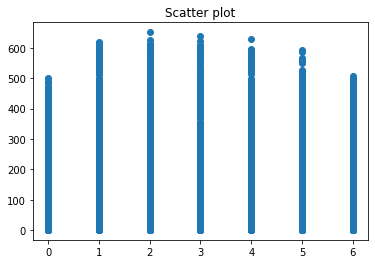

In [29]:
plt.scatter(bikes['weekday'], bikes['cnt'])
plt.title('Scatter plot')
plt.show()

In [30]:
bikes_weekday=bikes[['cnt','weekday']].groupby('weekday').mean().reset_index()
bikes_weekday

,weekday,cnt
0,0,143.845654
1,1,145.927935
2,2,147.576105
3,3,137.647681
4,4,142.491429
5,5,146.897498
6,6,142.201741


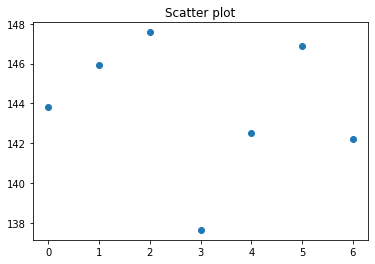

In [31]:
plt.scatter(bikes_weekday['weekday'], bikes_weekday['cnt'])
plt.title('Scatter plot')
plt.show()

##### Predictor: weathersit

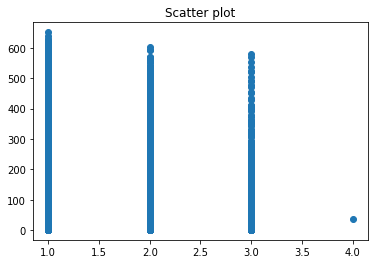

In [33]:
plt.scatter(bikes['weathersit'], bikes['cnt'])
plt.title('Scatter plot')
plt.show()

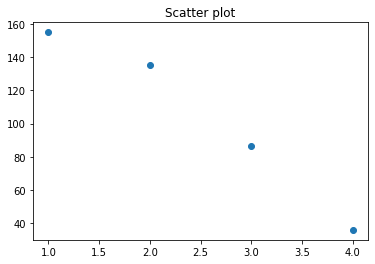

In [34]:
bikes_weekday=bikes[['cnt','weathersit']].groupby('weathersit').mean().reset_index()
plt.scatter(bikes_weekday['weathersit'], bikes_weekday['cnt'])
plt.title('Scatter plot')
plt.show()

##### Predictor: holiday

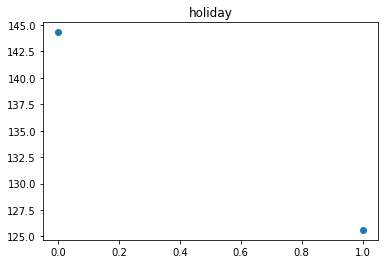

In [35]:
bikes_weekday=bikes[['cnt','holiday']].groupby('holiday').mean().reset_index()
plt.scatter(bikes_weekday['holiday'], bikes_weekday['cnt'])
plt.title('holiday')
plt.show()

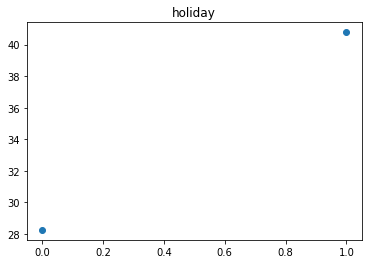

In [36]:
bikes_weekday=bikes[['casual','holiday']].groupby('holiday').mean().reset_index()
plt.scatter(bikes_weekday['holiday'], bikes_weekday['casual'])
plt.title('holiday')
plt.show()

##### Predictor: workingday

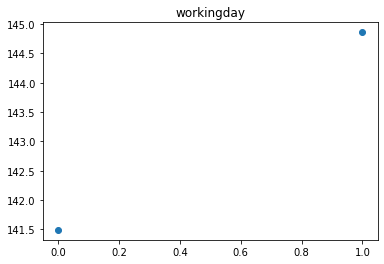

In [37]:
bikes_weekday=bikes[['cnt','workingday']].groupby('workingday').mean().reset_index()
plt.scatter(bikes_weekday['workingday'], bikes_weekday['cnt'])
plt.title('workingday')
plt.show()

##### Predictor: temp


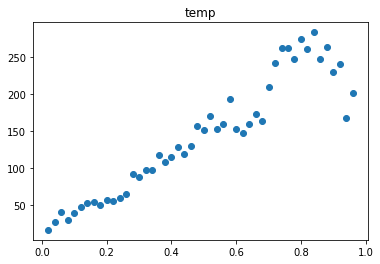

In [38]:
bikes_weekday=bikes[['cnt','temp']].groupby('temp').mean().reset_index()
plt.scatter(bikes_weekday['temp'], bikes_weekday['cnt'])
plt.title('temp')
plt.show()

## 2. Modeling

### 2.1 Starting Simple

In [39]:
X=bikes[['season']]
y=bikes['cnt']
X=sm.add_constant(X)
bike_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print (bike_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8643
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.2637e+05
Date:                Sat, 15 Aug 2020   Deviance:                   9.9970e+05
Time:                        20:24:22   Pearson chi2:                 1.01e+06
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4723      0.002   1838.809      0.0

### 2.2 Add-one

In [40]:
X=bikes[['season', 'temp']]
y=bikes['cnt']
X=sm.add_constant(X)
bike_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print (bike_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8642
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.3540e+05
Date:                Sat, 15 Aug 2020   Deviance:                   8.1776e+05
Time:                        20:34:23   Pearson chi2:                 8.03e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5891      0.004   1007.917      0.0

### 2.3 Add Many

In [52]:
var_list=['mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed']
selected_var=['season', 'temp']
bike_models=[]
bike_models_aic=[]
for i in var_list:
    selected_var.append(i)
    X=bikes[selected_var]
    y=bikes['cnt']
    X=sm.add_constant(X)
    currentmodel=sm.GLM(y, X, family=sm.families.Poisson()).fit()
    bike_models.append(currentmodel)
    bike_models_aic.append(currentmodel.aic)

In [53]:
bike_models_aic

[869635.8906805986,
 869202.2149922834,
 722729.0505928472,
 722415.0444100426,
 722244.5584161625,
 722014.7539584582,
 713938.5526483222,
 713938.7928148006,
 676253.4355562595,
 674826.002846984]

In [55]:
print(bike_models[-1].summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8632
Model Family:                 Poisson   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.3740e+05
Date:                Sat, 15 Aug 2020   Deviance:                   6.2176e+05
Time:                        20:55:51   Pearson chi2:                 6.88e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5576      0.006    552.398      0.0

## Model Prediction

In [64]:
X[0:1]

,const,season,temp,mnth,day,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed
0,1.0,1,0.24,1,1,0,0,6,0,1,0.2879,0.81,0.0


In [65]:
bike_models[-1].predict(X[0:1])

0    29.842909
dtype: float64

bike_count = exp($\vec{\beta}\cdot \vec{x}$) 

p.s. recall that canonical link-function for poinsson distribution is ln()

In [66]:
bike_models[-1].params

const         3.557642
season        0.103619
temp          0.323796
mnth          0.057313
day          -0.001102
hr            0.047837
holiday      -0.121971
weekday      -0.001119
workingday   -0.024833
weathersit   -0.013143
atemp         1.527074
hum          -1.011139
windspeed     0.291888
dtype: float64

In [70]:
np.exp(np.dot(bike_models[-1].params,X.iloc[0]))

29.842909028198623

In [71]:
ypred1st=bike_models[-1].predict(X) #in sample prediction
bikes['ypred1st']=ypred1st

In [72]:
bikes

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,ypred1st
0,1,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,29.842909
1,1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,30.698314
2,1,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,32.202506
3,1,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,36.602817
4,1,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,38.396324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,1,12,365,19,0,6,0,1,0.42,0.4242,0.54,0.2239,19,73,92,170.537190
8641,1,12,365,20,0,6,0,1,0.42,0.4242,0.54,0.2239,8,63,71,178.893370
8642,1,12,365,21,0,6,0,1,0.40,0.4091,0.58,0.1940,2,50,52,173.455091
8643,1,12,365,22,0,6,0,1,0.38,0.3939,0.62,0.1343,2,36,38,166.700128


## Model Interpretation

- #### How do you interpreting the $\beta$s?
- #### p-value and statistic significance

#### Interpreting $\beta_{temp}=0.3238$

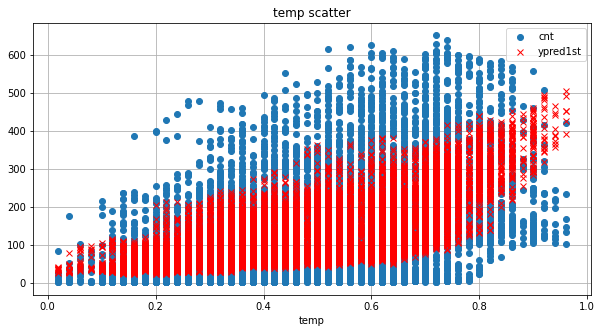

In [74]:
bikes.plot(x='temp', y=['cnt', 'ypred1st'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('temp scatter')
plt.show()

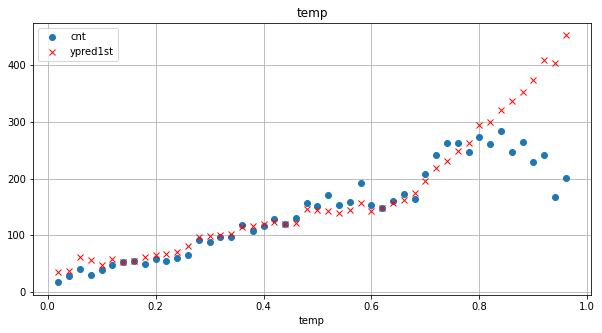

In [75]:
bikes_agg=bikes[['ypred1st','cnt', 'temp']].groupby('temp').mean().reset_index()

bikes_agg.plot(x='temp', y=['cnt', 'ypred1st'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('temp')
plt.show()

#### Interpreting $\beta_{holiday}=-0.1220$

In [ ]:
bikes.plot(x='holiday', y=['cnt', 'ypred1st'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('holiday scatter')
plt.xlim([-0.5,1.5])
plt.show()

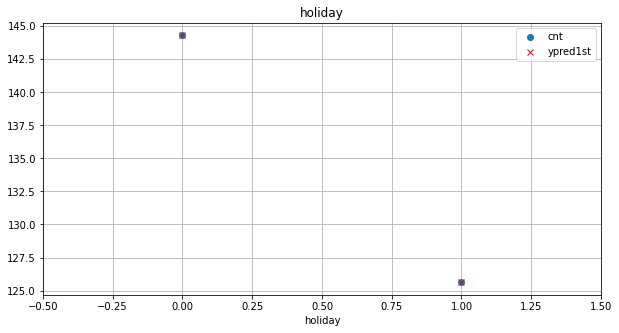

In [76]:
bikes_agg=bikes[['ypred1st','cnt', 'holiday']].groupby('holiday').mean().reset_index()
bikes_agg.plot(x='holiday', y=['cnt', 'ypred1st'], figsize=(10,5), grid=True, style=['o','rx'])
plt.xlim([-0.5,1.5])
plt.title('holiday')
plt.show()

#### Interpreting $\beta_{mnth}=0.0573$

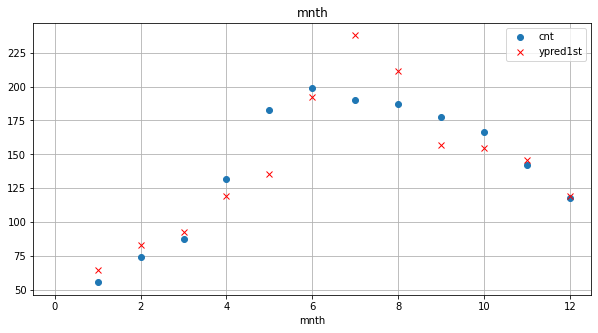

In [81]:
bikes_agg=bikes[['ypred1st','cnt', 'mnth']].groupby('mnth').mean().reset_index()
bikes_agg.plot(x='mnth', y=['cnt', 'ypred1st'], figsize=(10,5), grid=True, style=['o','rx'])
plt.xlim([-0.5,12.5])
plt.title('mnth')
plt.show()

## 3. Feature Engineering

### 3.1 Polynomial transformation

In [106]:
bikes['tempsquare']=np.power(bikes['temp'], 6)

In [107]:
X=bikes[['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'tempsquare']]
y=bikes['cnt']

In [108]:
X=sm.add_constant(X)
bike_model2 = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print (bike_model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8631
Model Family:                 Poisson   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.2869e+05
Date:                Sat, 15 Aug 2020   Deviance:                   6.0434e+05
Time:                        21:53:27   Pearson chi2:                 6.76e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4038      0.007    510.656      0.0

In [109]:
ypred2nd=bike_model2.predict(X)
bikes['ypred2nd']=ypred2nd

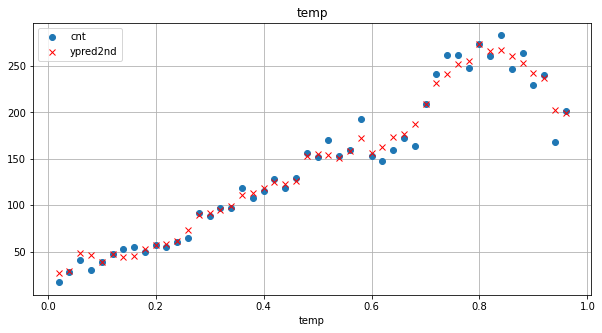

In [110]:
bikes_agg=bikes[['ypred2nd','cnt', 'temp']].groupby('temp').mean().reset_index()

bikes_agg.plot(x='temp', y=['cnt', 'ypred2nd'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('temp')
plt.show()

In [ ]:
bikes_agg=bikes[['ypred2nd','cnt', 'weekday']].groupby('weekday').mean().reset_index()
bikes_agg.plot(x='weekday', y=['cnt', 'ypred2nd'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('weekday')
plt.show()

### 3.2 One Hot Encoding

In [117]:
bikes['weekdaystr']=bikes['weekday'].astype(str)

In [118]:
np.unique(bikes['weekdaystr'])

array(['0', '1', '2', '3', '4', '5', '6'], dtype=object)

In [119]:
one_hot = pd.get_dummies(bikes['weekdaystr'])

In [120]:
one_hot

,0,1,2,3,4,5,6
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
8640,0,0,0,0,0,0,1
8641,0,0,0,0,0,0,1
8642,0,0,0,0,0,0,1
8643,0,0,0,0,0,0,1


In [121]:
bikes = bikes.drop('weekdaystr',axis = 1)
bikes = bikes.join(one_hot)

In [122]:
bikes

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,...,ypred1st,tempsquare,ypred2nd,0,1,2,3,4,5,6
0,1,1,1,0,0,6,0,1,0.24,0.2879,...,29.842909,0.000191,25.859494,0,0,0,0,0,0,1
1,1,1,1,1,0,6,0,1,0.22,0.2727,...,30.698314,0.000113,26.145587,0,0,0,0,0,0,1
2,1,1,1,2,0,6,0,1,0.22,0.2727,...,32.202506,0.000113,27.408055,0,0,0,0,0,0,1
3,1,1,1,3,0,6,0,1,0.24,0.2879,...,36.602817,0.000191,32.051245,0,0,0,0,0,0,1
4,1,1,1,4,0,6,0,1,0.24,0.2879,...,38.396324,0.000191,33.598873,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,1,12,365,19,0,6,0,1,0.42,0.4242,...,170.537190,0.005489,177.776443,0,0,0,0,0,0,1
8641,1,12,365,20,0,6,0,1,0.42,0.4242,...,178.893370,0.005489,186.360566,0,0,0,0,0,0,1
8642,1,12,365,21,0,6,0,1,0.40,0.4091,...,173.455091,0.004096,176.498014,0,0,0,0,0,0,1
8643,1,12,365,22,0,6,0,1,0.38,0.3939,...,166.700128,0.003011,165.907122,0,0,0,0,0,0,1


In [123]:
X=bikes[['season', 'mnth', 'day', 'hr', 'holiday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'tempsquare', '0',
       '1', '2', '3', '4', '5', '6']]
y=bikes['cnt']
X=sm.add_constant(X)
bike_model3 = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print (bike_model3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8627
Model Family:                 Poisson   Df Model:                           17
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.2845e+05
Date:                Sat, 15 Aug 2020   Deviance:                   6.0386e+05
Time:                        22:10:29   Pearson chi2:                 6.76e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6085      0.005    523.817      0.0

In [124]:
ypred3rd=bike_model3.predict(X)
bikes['ypred3rd']=ypred3rd

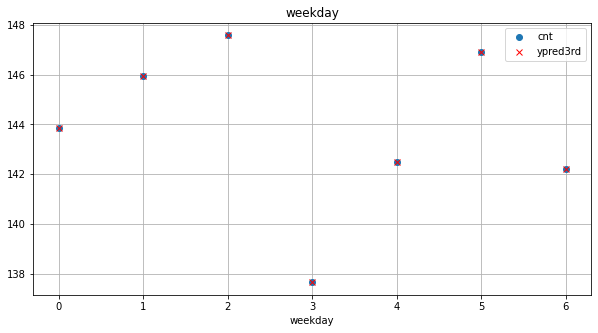

In [125]:
bikes_agg=bikes[['ypred3rd','cnt', 'weekday']].groupby('weekday').mean().reset_index()
bikes_agg.plot(x='weekday', y=['cnt', 'ypred3rd'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('weekday')
plt.show()

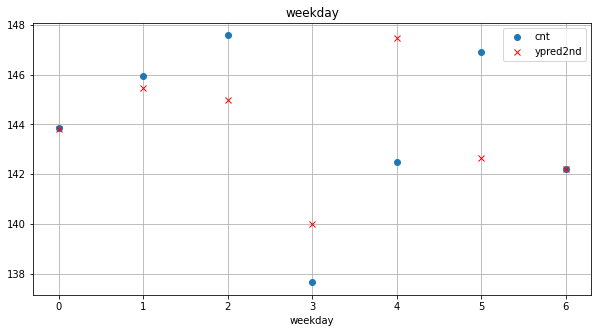

In [126]:
bikes_agg=bikes[['ypred2nd','cnt', 'weekday']].groupby('weekday').mean().reset_index()
bikes_agg.plot(x='weekday', y=['cnt', 'ypred2nd'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('weekday')
plt.show()

## 4. Model Evaulation

### 4.1 Log likelihood

$\log f(y_i, \theta_i, \phi)=y_i \log(\lambda_i)-\lambda_i-log(y_i!)$

Using Stirling's formula to approximate $log(y_i!)=y_ilog(y_i)-y_i$

$\log f(y_i, \theta_i, \phi)=y_i \log(\lambda_i)-y_ilog(y_i)+y_i-\lambda_i$

In [127]:
from scipy.special import gamma, factorial
facsum=0
for i in y:
    if np.isinf(factorial(i)):
        facsum+=i*np.log(i)-i
    else:
        facsum+=np.log(factorial(i))

np.dot(y, np.log(bikes["ypred1st"]))-np.sum(bikes["ypred1st"])-facsum

-326427.19907497056

In [128]:
np.dot(y, np.log(bikes["ypred1st"]))-np.dot(y, np.log(y))+np.sum(y)-np.sum(bikes["ypred1st"])

-310881.1053988449

In [129]:
bike_model.llf

-337400.001423492

In [130]:
bike_model2.llf

-328689.13777909137

In [131]:
bike_model3.llf

-328451.1818657682

In [132]:
bike_model.deviance

621762.2107976824

In [133]:
bike_model2.deviance

604340.4835088813

In [134]:
bike_model3.deviance

603864.571682235

## 5. Cross Validation, Overfitting

In [135]:
import numpy as np
from sklearn.utils import shuffle
bikes_shuffle=shuffle(bikes)

In [136]:
bikes

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,...,tempsquare,ypred2nd,0,1,2,3,4,5,6,ypred3rd
0,1,1,1,0,0,6,0,1,0.24,0.2879,...,0.000191,25.859494,0,0,0,0,0,0,1,25.778490
1,1,1,1,1,0,6,0,1,0.22,0.2727,...,0.000113,26.145587,0,0,0,0,0,0,1,26.060363
2,1,1,1,2,0,6,0,1,0.22,0.2727,...,0.000113,27.408055,0,0,0,0,0,0,1,27.318500
3,1,1,1,3,0,6,0,1,0.24,0.2879,...,0.000191,32.051245,0,0,0,0,0,0,1,31.948248
4,1,1,1,4,0,6,0,1,0.24,0.2879,...,0.000191,33.598873,0,0,0,0,0,0,1,33.490639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,1,12,365,19,0,6,0,1,0.42,0.4242,...,0.005489,177.776443,0,0,0,0,0,0,1,178.068469
8641,1,12,365,20,0,6,0,1,0.42,0.4242,...,0.005489,186.360566,0,0,0,0,0,0,1,186.665218
8642,1,12,365,21,0,6,0,1,0.40,0.4091,...,0.004096,176.498014,0,0,0,0,0,0,1,176.729962
8643,1,12,365,22,0,6,0,1,0.38,0.3939,...,0.003011,165.907122,0,0,0,0,0,0,1,166.031656


In [137]:
bikes_shuffle

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,...,tempsquare,ypred2nd,0,1,2,3,4,5,6,ypred3rd
6733,4,10,286,3,0,4,1,2,0.54,0.5152,...,2.479491e-02,75.618644,0,0,0,0,1,0,0,73.107521
538,1,1,24,14,0,1,1,2,0.14,0.1364,...,7.529536e-06,54.354208,0,1,0,0,0,0,0,54.549685
4522,3,7,193,8,0,2,1,1,0.76,0.7121,...,1.926999e-01,182.296289,0,0,1,0,0,0,0,185.554827
882,1,2,40,6,0,3,1,1,0.06,0.1515,...,4.665600e-08,34.002200,0,0,0,1,0,0,0,33.280447
5452,3,8,232,2,0,6,0,1,0.62,0.5909,...,5.680024e-02,95.383717,0,0,0,0,0,0,1,95.225161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,2,6,158,2,0,2,1,1,0.60,0.5909,...,4.665600e-02,87.022439,0,0,1,0,0,0,0,88.518066
1565,1,3,69,16,0,4,1,3,0.42,0.4242,...,5.489032e-03,235.387570,0,0,0,0,1,0,0,227.868661
4879,3,7,208,5,0,3,1,1,0.70,0.6515,...,1.176490e-01,161.893832,0,0,0,1,0,0,0,159.213788
1837,2,3,81,7,0,2,1,2,0.40,0.4091,...,4.096000e-03,62.363129,0,0,1,0,0,0,0,63.449648


In [138]:
y_shuffle=bikes_shuffle['cnt']

X_shuffle=bikes_shuffle[['season', 'mnth', 'day', 'hr', 'holiday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'tempsquare', '0','1', '2', '3', '4', '5', '6']]

In [140]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [145]:
X.shape[0]/5

1729.0

In [141]:
for train, test in kf.split(X_shuffle):
    print("%s %s" % (train, test))

[1729 1730 1731 ... 8642 8643 8644] [   0    1    2 ... 1726 1727 1728]
[   0    1    2 ... 8642 8643 8644] [1729 1730 1731 ... 3455 3456 3457]
[   0    1    2 ... 8642 8643 8644] [3458 3459 3460 ... 5184 5185 5186]
[   0    1    2 ... 8642 8643 8644] [5187 5188 5189 ... 6913 6914 6915]
[   0    1    2 ... 6913 6914 6915] [6916 6917 6918 ... 8642 8643 8644]


In [146]:
y_pred_cv= np.empty((0, 1))
for train, test in kf.split(X_shuffle):
    bike_modelcv = sm.GLM(y_shuffle.iloc[train], X_shuffle.iloc[train], family=sm.families.Poisson()).fit()
    y_pred_cv=np.append(y_pred_cv,bike_modelcv.predict(X_shuffle.iloc[test]))

In [147]:
bikes_shuffle['y_pred_cv']=y_pred_cv

<ipython-input-147-dee27738a559>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_shuffle['y_pred_cv']=y_pred_cv


In [148]:
bikes_shuffle

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,...,ypred2nd,0,1,2,3,4,5,6,ypred3rd,y_pred_cv
6733,4,10,286,3,0,4,1,2,0.54,0.5152,...,75.618644,0,0,0,0,1,0,0,73.107521,74.552750
538,1,1,24,14,0,1,1,2,0.14,0.1364,...,54.354208,0,1,0,0,0,0,0,54.549685,55.180201
4522,3,7,193,8,0,2,1,1,0.76,0.7121,...,182.296289,0,0,1,0,0,0,0,185.554827,186.767492
882,1,2,40,6,0,3,1,1,0.06,0.1515,...,34.002200,0,0,0,1,0,0,0,33.280447,32.579750
5452,3,8,232,2,0,6,0,1,0.62,0.5909,...,95.383717,0,0,0,0,0,0,1,95.225161,93.956414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,2,6,158,2,0,2,1,1,0.60,0.5909,...,87.022439,0,0,1,0,0,0,0,88.518066,90.304413
1565,1,3,69,16,0,4,1,3,0.42,0.4242,...,235.387570,0,0,0,0,1,0,0,227.868661,227.296666
4879,3,7,208,5,0,3,1,1,0.70,0.6515,...,161.893832,0,0,0,1,0,0,0,159.213788,159.678988
1837,2,3,81,7,0,2,1,2,0.40,0.4091,...,62.363129,0,0,1,0,0,0,0,63.449648,63.201658


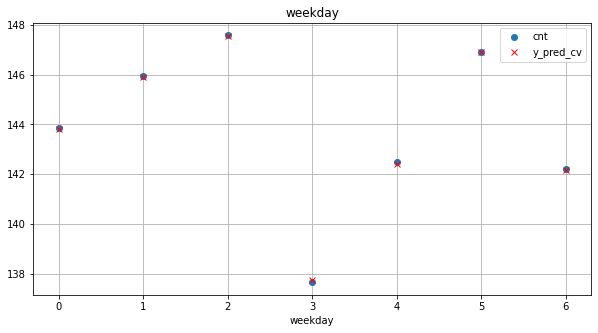

In [149]:
bikes_agg=bikes_shuffle[['y_pred_cv','cnt', 'weekday']].groupby('weekday').mean().reset_index()
bikes_agg.plot(x='weekday', y=['cnt', 'y_pred_cv'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('weekday')
plt.show()

In [150]:
loglikelihood_cv=np.dot(y_shuffle, np.log(bikes_shuffle["y_pred_cv"]))-np.dot(y_shuffle, np.log(y_shuffle))+np.sum(y_shuffle)-np.sum(bikes_shuffle["y_pred_cv"])

In [151]:
loglikelihood_insample=np.dot(y, np.log(bikes["ypred3rd"]))-np.dot(y, np.log(y))+np.sum(y)-np.sum(bikes["ypred3rd"])

In [152]:
loglikelihood_cv

-303266.6717467939

In [153]:
loglikelihood_insample

-301932.28584112204